In [3]:
!pip install selenium

In [24]:
import requests
from bs4 import BeautifulSoup
from selenium import webdrier
from selenium.webdriver.common.by import By
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import os
import pandas as pd
from datetime import datetime

url = "https://www.cellphones.com.vn/mobile.html"

def extend_website(url):
    # Setup WebDriver for Edge
    service = Service(executable_path=r'C:\\Users\\Dell\\Downloads\\edgedriver_win64\\msedgedriver.exe')
    driver = webdriver.Edge(service=service)
    driver.get(url)
    
    # Close pop-ups if they appear
    try:
        WebDriverWait(driver, 30).until(
            EC.presence_of_element_located((By.CSS_SELECTOR,
                "#layout-desktop > div.cps-container.cps-body > div:nth-child(2) > div:nth-child(2) > div > div.modal-content > button"))).click()
    except Exception:
        print("No pop-up to close (or timed out). Continuing...")
    
    try:
        WebDriverWait(driver, 30).until(
            EC.presence_of_element_located((By.CSS_SELECTOR,
                "#subscriberEmail > div.subscriber-popup.box-banner > div.subscriber-popup-body > button"))).click()
    except Exception:
        print("No subscription pop-up to close (or timed out). Continuing...")
    
    # Click "Xem thêm" until all products are loaded
    while True:
        try:
            # Find "Xem thêm" button using XPath
            xem_them_button = driver.find_element(By.XPATH, '//*[contains(text(), "Xem thêm") and contains(text(), "sản phẩm")]')
            ActionChains(driver).move_to_element(xem_them_button).perform()  # Scroll to the button
            xem_them_button.click()  # Click the button
            time.sleep(2)  # Wait for products to load
        except Exception as e:
            print("No more 'Xem thêm' button found or error occurred:", e)
            break
    
    # Get the page source after all products are loaded
    html = driver.page_source
    driver.quit()
    return html

def scrape_cellphones(html):
    # Use BeautifulSoup to parse the HTML
    soup = BeautifulSoup(html, 'html.parser')

    # Find all phone names and prices
    phones = soup.find_all("h3")
    prices = soup.find_all("p", class_="product__price--show")
    
    phone_list = []
    
    for phone, price in zip(phones, prices):
        phone_list.append({
            "Product": phone.text.strip(),
            "Price": price.text.replace("₫", "").replace(".", "").strip(),
            "Date": datetime.now().strftime("%Y-%m-%d")
        })
    
    return phone_list

def save_data_weekly(html):
    cellphones_data = scrape_cellphones(html)

    # Convert the scraped data into a DataFrame
    df = pd.DataFrame(cellphones_data, columns=['Product', 'Price', 'Date'])

    # Check if the file exists, and append or create a new file
    if not os.path.isfile('phone_prices_cellphones.csv'):
        df.to_csv('phone_prices_cellphones.csv', mode='w', header=True, index=False)
    else:
        df.to_csv('phone_prices_cellphones.csv', mode='a', header=False, index=False)

# Execute the scraping and saving
html = extend_website(url)
res = scrape_cellphones(html)
print(f"Total products scraped: {len(res)}")
save_data_weekly(html)


No pop-up to close (or timed out). Continuing...
No subscription pop-up to close (or timed out). Continuing...
No more 'Xem thêm' button found or error occurred: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: MicrosoftEdge=129.0.2792.65)
Stacktrace:
	GetHandleVerifier [0x00007FF7B53CCEC5+12997]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF7B564BCA4+1897908]
	(No symbol) [0x00007FF7B517F1CC]
	(No symbol) [0x00007FF7B515AB09]
	(No symbol) [0x00007FF7B51EE83B]
	(No symbol) [0x00007FF7B52021DA]
	(No symbol) [0x00007FF7B51E7BB3]
	(No symbol) [0x00007FF7B51BB5AC]
	(No symbol) [0x00007FF7B51BAA8D]
	(No symbol) [0x00007FF7B51BB171]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF7B5579DD4+1038052]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF7B52F08BF+56655]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF7B52E3063+1267]
	Microsoft::Applicat

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: MicrosoftEdge=129.0.2792.65)
Stacktrace:
	GetHandleVerifier [0x00007FF7B53CCEC5+12997]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF7B564BCA4+1897908]
	(No symbol) [0x00007FF7B517F1CC]
	(No symbol) [0x00007FF7B515AB09]
	(No symbol) [0x00007FF7B51EE83B]
	(No symbol) [0x00007FF7B52021DA]
	(No symbol) [0x00007FF7B51E7BB3]
	(No symbol) [0x00007FF7B51BB5AC]
	(No symbol) [0x00007FF7B51BAA8D]
	(No symbol) [0x00007FF7B51BB171]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF7B5579DD4+1038052]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF7B52F08BF+56655]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF7B52E3063+1267]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF7B5578B5D+1033325]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF7B5369731+327857]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF7B5365BB4+312628]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF7B5365CE9+312937]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF7B535C25C+273372]
	BaseThreadInitThunk [0x00007FF89C8A257D+29]
	RtlUserThreadStart [0x00007FF89D88AF08+40]


In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import time
import os
from bs4 import BeautifulSoup
import pandas as pd

# Set up the WebDriver
url = "https://hoanghamobile.com/dien-thoai-di-dong"

def scrape_all_products():
    service = Service(executable_path=r'C:\\Users\\Dell\\Downloads\\edgedriver_win64\\msedgedriver.exe')
    driver = webdriver.Edge(service=service)
    driver.get(url)
    driver.maximize_window()
    
    while True:
        try:
            # Wait for the "Xem thêm" button to be clickable and click it
            time.sleep(2)  # Add delay to let the page load properly
            
            # Locate the "Xem thêm" button by its XPath
            xem_them_button = driver.find_element(By.XPATH, "//a[contains(., 'Xem thêm')]")
            
            # Scroll into view and click the button
            driver.execute_script("arguments[0].scrollIntoView(true);", xem_them_button)
            time.sleep(1)  # Wait for the button to be fully visible
            xem_them_button.click()
            
            # Wait for products to load
            time.sleep(3)
        except Exception as e:
            print("No more 'Xem thêm' buttons found or an error occurred:", e)
            break

    html = driver.page_source
    driver.quit()

    # Parse the HTML with BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    
    phone_elements = soup.find_all('h3')
    price_elements = soup.find_all('div', class_='price')

    phone_list = []
    
    for phone, price in zip(phone_elements, price_elements):
        # Extract the product name and price
        product_name = phone.find('a').get('title', phone.text.strip())
        product_price = price.find('strong').text.replace("₫", "").replace(".", "").strip()

        phone_list.append({
            "Product": product_name,
            "Price": product_price,
            "Date": pd.Timestamp.now().strftime("%Y-%m-%d")
        })

    return phone_list

def save_data_weekly():
    cellphones_data = scrape_all_products()

    # Create DataFrame and save to CSV
    df = pd.DataFrame(cellphones_data, columns=['Product', 'Price', 'Date'])
    
    if not os.path.isfile('phones_price_hoangha.csv'):
        df.to_csv('phones_price_hoangha.csv', mode='w', header=True, index=False)
    else:
        df.to_csv('phones_price_hoangha.csv', mode='a', header=False, index=False)

# Run the scraping and save the data
save_data_weekly()


No more 'Xem thêm' buttons found or an error occurred: Message: element click intercepted: Element <a href="/dien-thoai-di-dong?p=2">...</a> is not clickable at point (882, 18). Other element would receive the click: <ul class="root">...</ul>
  (Session info: MicrosoftEdge=129.0.2792.65)
Stacktrace:
	GetHandleVerifier [0x00007FF60F2DCEC5+12997]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF60F55BCA4+1897908]
	(No symbol) [0x00007FF60F08F1CC]
	(No symbol) [0x00007FF60F0DCB0D]
	(No symbol) [0x00007FF60F0DADBE]
	(No symbol) [0x00007FF60F0D8B2A]
	(No symbol) [0x00007FF60F0D7F3F]
	(No symbol) [0x00007FF60F0CC65A]
	(No symbol) [0x00007FF60F0F7F4A]
	(No symbol) [0x00007FF60F0CC09D]
	(No symbol) [0x00007FF60F0CBF6D]
	(No symbol) [0x00007FF60F0F8230]
	(No symbol) [0x00007FF60F0CC09D]
	(No symbol) [0x00007FF60F112887]
	(No symbol) [0x00007FF60F0F7BB3]
	(No symbol) [0x00007FF60F0CB5AC]
	(No symbol) [0x00007FF60F0CAA8D]
	(No symbol) [0x00007FF60F0CB171]
	Microsoft::Applications:

In [8]:
df = pd.read_csv('phone_prices_cellphones.csv')

df['Price'] = df['Price'].astype(int)

prices = df['Price'].tolist()

df['Segment'] = pd.cut(df['Price'], bins=[0, 5000000, 15000000, 30000000], labels=["Low", "Mid", "High"])

print(df[['Product', 'Price', 'Segment']])  


                                  Product     Price Segment
0                      TECNO SPARK 20PRO+   4717000     Low
1            TECNO SPARK Go 2024 4GB 64GB   1598000     Low
2      Samsung Galaxy S24 Plus 12GB 512GB  29790000    High
3      Samsung Galaxy S23 FE 5G 8GB 128GB  12885000     Mid
4      Samsung Galaxy S24 Plus 12GB 256GB  19931000    High
...                                   ...       ...     ...
15387                          Xiaomi 14T  13691000     Mid
15388            iPhone 12 Pro Max 128GB   23683000    High
15389    Xiaomi Redmi Note 13 (6GB 128GB)   4608000     Low
15390       Samsung Galaxy S23 8GB 128GB   14246000     Mid
15391            iPhone 13 Pro Max 128GB   22647000    High

[15392 rows x 3 columns]


In [6]:
import pandas as pd

df1 = pd.read_csv('phones_price_hoangha.csv')

# Remove commas from the 'Price' column and convert to integers
df1['Price'] = df1['Price'].str.replace(',', '').astype(int)

# Adjust the bin ranges to cover all price ranges, including higher-end products
bins = [0, 5000000, 15000000, 30000000, 60000000]  # Added a higher bin
labels = ["Low", "Mid", "High", "Premium"]  # Added a new label for higher-end products

# Segment the prices into categories
df1['Segment'] = pd.cut(df1['Price'], bins=bins, labels=labels, include_lowest=True)

# Print the relevant columns
print(df1[['Product', 'Price', 'Segment']])


                                 Product     Price  Segment
0      Samsung Galaxy Z Flip6 12GB/256GB  29172504     High
1                          iPhone 16 Pro  37621811  Premium
2      Samsung Galaxy Z Flip6 12GB/256GB  30566811  Premium
3        Samsung Galaxy Z Fold6 12GB/1TB  46206501  Premium
4              iPhone 16 Pro Max (512GB)  50342919  Premium
...                                  ...       ...      ...
14995  Samsung Galaxy Z Fold6 12GB/256GB  40818207  Premium
14996  Samsung Galaxy Z Fold6 12GB/512GB  43891678  Premium
14997  Samsung Galaxy Z Flip6 12GB/256GB  29864407     High
14998                     iPhone 16 Plus  31522505  Premium
14999                  iPhone 16 (256GB)  30738307  Premium

[15000 rows x 3 columns]


In [9]:

print(df)
print("------------")
print(df1)



                                  Product     Price       Date Segment
0                      TECNO SPARK 20PRO+   4717000  10/7/2023     Low
1            TECNO SPARK Go 2024 4GB 64GB   1598000  10/7/2023     Low
2      Samsung Galaxy S24 Plus 12GB 512GB  29790000  10/7/2023    High
3      Samsung Galaxy S23 FE 5G 8GB 128GB  12885000  10/7/2023     Mid
4      Samsung Galaxy S24 Plus 12GB 256GB  19931000  10/7/2023    High
...                                   ...       ...        ...     ...
15387                          Xiaomi 14T  13691000  9/28/2024     Mid
15388            iPhone 12 Pro Max 128GB   23683000  9/28/2024    High
15389    Xiaomi Redmi Note 13 (6GB 128GB)   4608000  9/28/2024     Low
15390       Samsung Galaxy S23 8GB 128GB   14246000  9/28/2024     Mid
15391            iPhone 13 Pro Max 128GB   22647000  9/28/2024    High

[15392 rows x 4 columns]
------------
                                 Product     Price        Date  Segment
0      Samsung Galaxy Z Flip6 12GB/25

In [10]:

df = pd.read_csv('phone_prices_cellphones.csv')

unwanted_phrases = [" Chỉ có tại CellphoneS ", "Chính hãng VN/A", "Giá mới chỉ có tại CellphoneS"]

for phrase in unwanted_phrases:
    df['Product'] = df['Product'].str.replace(phrase, '', regex=False)

df['Product'] = df['Product'].str.strip()

df.to_csv('cleaned_file.csv', index=False)


In [11]:
df['Price'] = df['Price'].astype(int)

In [12]:
df1['Price'] = df['Price'].astype(int)

In [13]:
df['Segment'] = pd.cut(df['Price'], bins=[0, 5000000, 15000000, 30000000], labels=["Low", "Mid", "High"])
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df['Date'].dt.to_period('W')
df['Month'] = df['Date'].dt.to_period('M')
segment_avg = df.groupby(['Segment'])['Price'].mean()
weekly_avg = df.groupby('Week')['Price'].mean()
monthly_avg = df.groupby('Month')['Price'].mean()

weekly_avg_vnd = weekly_avg.apply(lambda x: "{:,.0f} VND".format(x))
monthly_avg_vnd = monthly_avg.apply(lambda x: "{:,.0f} VND".format(x))
segment_avg_vnd = segment_avg.apply(lambda x: "{:,.0f} VND".format(x))



C:\Users\Dell\AppData\Local\Temp\ipykernel_11988\2404957020.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_avg = df.groupby(['Segment'])['Price'].mean()


In [14]:
df1['Segment'] = pd.cut(df1['Price'], bins=[0, 5000000, 15000000, 30000000], labels=["Low", "Mid", "High"])
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Week'] = df1['Date'].dt.to_period('W')
df1['Month'] = df1['Date'].dt.to_period('M')
segment_avg1 = df1.groupby(['Segment'])['Price'].mean()
weekly_avg1 = df1.groupby('Week')['Price'].mean()
monthly_avg1 = df1.groupby('Month')['Price'].mean()

weekly_avg_vnd1 = weekly_avg.apply(lambda x: "{:,.0f} VND".format(x))
monthly_avg_vnd1 = monthly_avg.apply(lambda x: "{:,.0f} VND".format(x))
segment_avg_vnd1 = segment_avg.apply(lambda x: "{:,.0f} VND".format(x))



C:\Users\Dell\AppData\Local\Temp\ipykernel_11988\2642760600.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_avg1 = df1.groupby(['Segment'])['Price'].mean()


In [15]:
print(weekly_avg_vnd)
print(monthly_avg_vnd)
print(segment_avg_vnd)

Week
2023-10-02/2023-10-08    17,239,885 VND
2023-10-09/2023-10-15    17,251,912 VND
2023-10-16/2023-10-22    17,221,703 VND
2023-10-23/2023-10-29    17,219,953 VND
2023-10-30/2023-11-05    17,186,419 VND
2023-11-06/2023-11-12    17,172,030 VND
2023-11-13/2023-11-19    17,169,547 VND
2023-11-20/2023-11-26    17,179,946 VND
2023-11-27/2023-12-03    17,197,199 VND
2023-12-04/2023-12-10    17,210,061 VND
2023-12-11/2023-12-17    17,151,341 VND
2023-12-18/2023-12-24    17,152,189 VND
2023-12-25/2023-12-31    17,172,399 VND
2024-01-01/2024-01-07    17,150,855 VND
2024-01-08/2024-01-14    17,179,645 VND
2024-01-15/2024-01-21    17,186,213 VND
2024-01-22/2024-01-28    17,153,169 VND
2024-01-29/2024-02-04    17,145,868 VND
2024-02-05/2024-02-11    17,113,206 VND
2024-02-12/2024-02-18    17,124,760 VND
2024-02-19/2024-02-25    17,179,706 VND
2024-02-26/2024-03-03    17,237,176 VND
2024-03-04/2024-03-10    17,209,037 VND
2024-03-11/2024-03-17    17,199,797 VND
2024-03-18/2024-03-24    17,226,848

In [16]:
print(weekly_avg_vnd1)
print(monthly_avg_vnd1)
print(segment_avg_vnd1)

Week
2023-10-02/2023-10-08    17,239,885 VND
2023-10-09/2023-10-15    17,251,912 VND
2023-10-16/2023-10-22    17,221,703 VND
2023-10-23/2023-10-29    17,219,953 VND
2023-10-30/2023-11-05    17,186,419 VND
2023-11-06/2023-11-12    17,172,030 VND
2023-11-13/2023-11-19    17,169,547 VND
2023-11-20/2023-11-26    17,179,946 VND
2023-11-27/2023-12-03    17,197,199 VND
2023-12-04/2023-12-10    17,210,061 VND
2023-12-11/2023-12-17    17,151,341 VND
2023-12-18/2023-12-24    17,152,189 VND
2023-12-25/2023-12-31    17,172,399 VND
2024-01-01/2024-01-07    17,150,855 VND
2024-01-08/2024-01-14    17,179,645 VND
2024-01-15/2024-01-21    17,186,213 VND
2024-01-22/2024-01-28    17,153,169 VND
2024-01-29/2024-02-04    17,145,868 VND
2024-02-05/2024-02-11    17,113,206 VND
2024-02-12/2024-02-18    17,124,760 VND
2024-02-19/2024-02-25    17,179,706 VND
2024-02-26/2024-03-03    17,237,176 VND
2024-03-04/2024-03-10    17,209,037 VND
2024-03-11/2024-03-17    17,199,797 VND
2024-03-18/2024-03-24    17,226,848

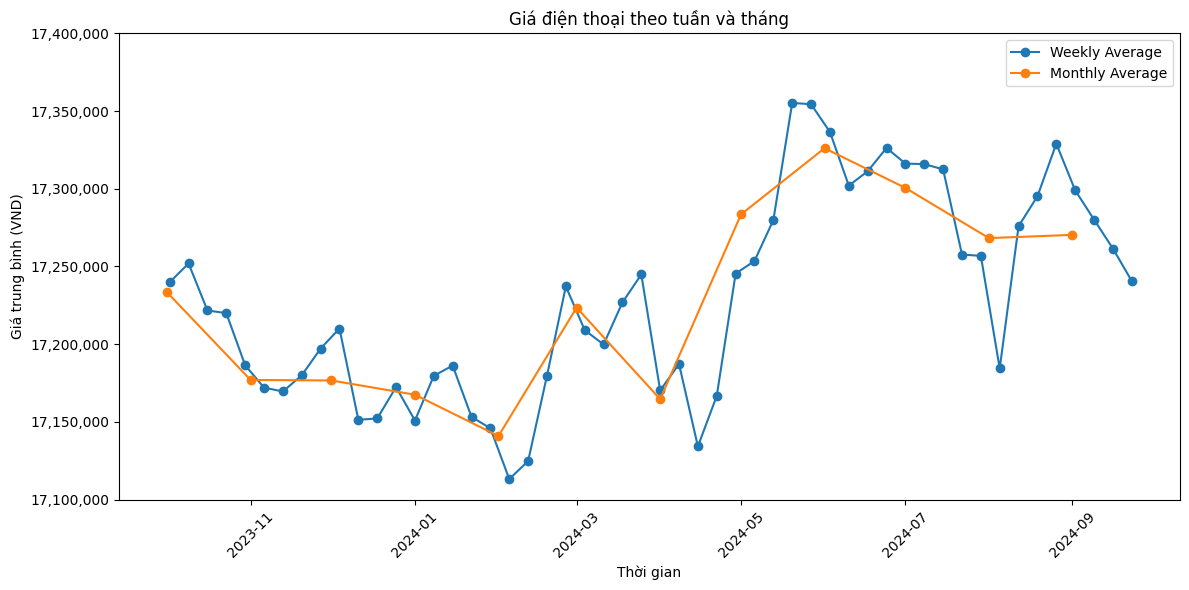

In [17]:
# Vẽ biểu đồ giá theo thời gian (theo tuần và tháng)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(weekly_avg.index.astype('datetime64[ns]'), weekly_avg.values, label='Weekly Average', marker='o')
plt.plot(monthly_avg.index.astype('datetime64[ns]'), monthly_avg.values, label='Monthly Average', marker='o')

plt.title('Giá điện thoại theo tuần và tháng')
plt.xlabel('Thời gian')
plt.ylabel('Giá trung bình (VND)')

# Đặt định dạng cho trục y và x
yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{int(tick):,.0f}' for tick in yticks])
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


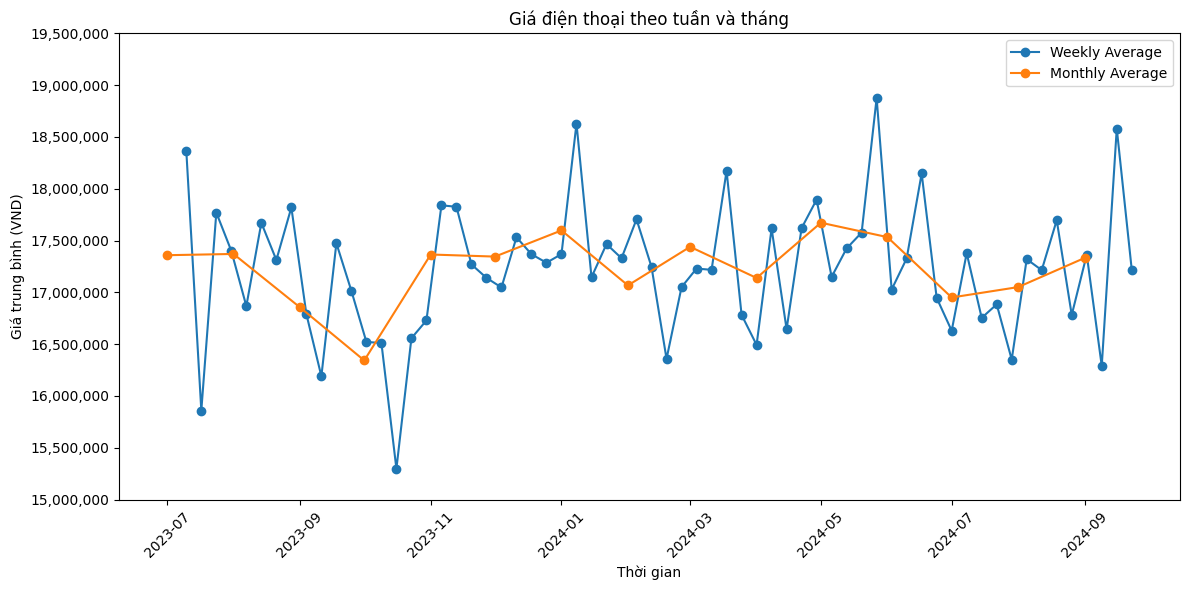

In [18]:
# Vẽ biểu đồ giá theo thời gian (theo tuần và tháng)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(weekly_avg1.index.astype('datetime64[ns]'), weekly_avg1.values, label='Weekly Average', marker='o')
plt.plot(monthly_avg1.index.astype('datetime64[ns]'), monthly_avg1.values, label='Monthly Average', marker='o')

plt.title('Giá điện thoại theo tuần và tháng')
plt.xlabel('Thời gian')
plt.ylabel('Giá trung bình (VND)')

# Đặt định dạng cho trục y và x
yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{int(tick):,.0f}' for tick in yticks])
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


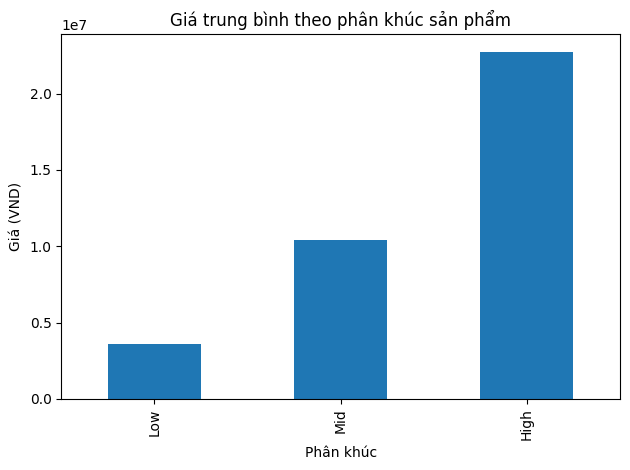

In [19]:
segment_avg.plot(kind='bar', title='Giá trung bình theo phân khúc sản phẩm', ylabel='Giá (VND)', xlabel='Phân khúc')
plt.tight_layout()
plt.show()


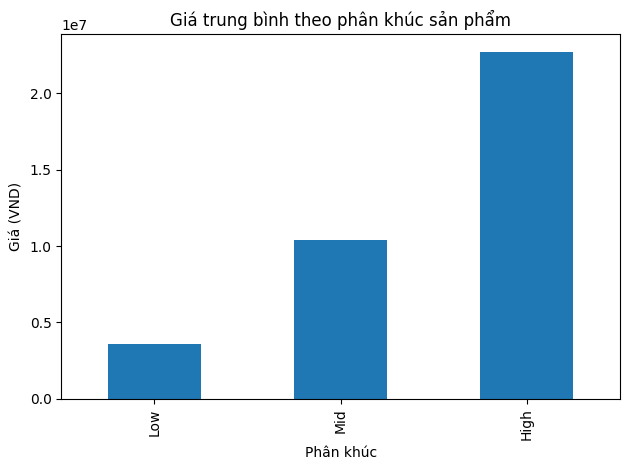

In [20]:
segment_avg1.plot(kind='bar', title='Giá trung bình theo phân khúc sản phẩm', ylabel='Giá (VND)', xlabel='Phân khúc')
plt.tight_layout()
plt.show()


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Chuyển đổi cột Date thành số tuần (numeric)
df['Date_Numeric'] = df['Date'].dt.strftime('%Y%U').astype(int)

# Chọn các biến cho mô hình hồi quy
X = df[['Date_Numeric']]
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Mô hình hồi quy
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán giá điện thoại trong tương lai
future_weeks = pd.DataFrame({'Date_Numeric': range(df['Date_Numeric'].max(), df['Date_Numeric'].max() + 10)})
predictions = model.predict(future_weeks)
print(predictions)


[17196756.15110575 17196195.83282247 17195635.51453918 17195075.19625591
 17194514.87797262 17193954.55968934 17193394.24140605 17192833.92312276
 17192273.60483949 17191713.2865562 ]


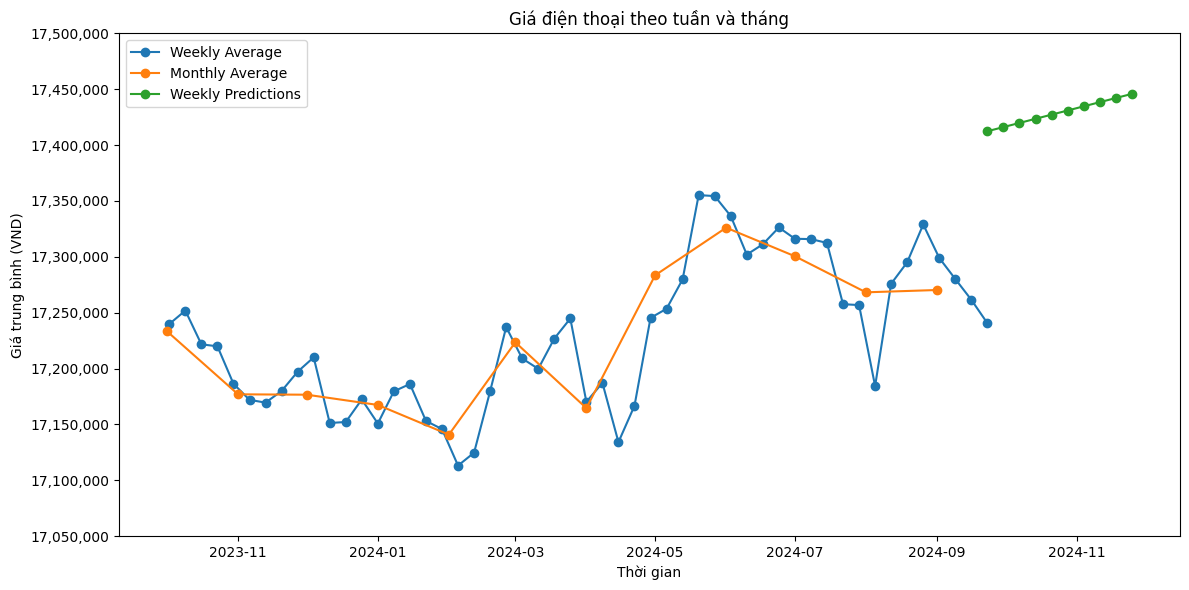

In [12]:

# Hàm chuyển date_numeric về datetime
def convert_to_date(date_numeric):
    year = date_numeric // 100  # Lấy phần năm
    week = date_numeric % 100    # Lấy phần tuần
    # Tạo ngày đầu tiên của tuần
    return pd.to_datetime(f'{year}-W{week}-1', format='%Y-W%U-%w')

# Vẽ biểu đồ giá theo thời gian (theo tuần và tháng)
plt.figure(figsize=(12, 6))
plt.plot(weekly_avg.index.astype('datetime64[ns]'), weekly_avg.values, label='Weekly Average', marker='o')
plt.plot(monthly_avg.index.astype('datetime64[ns]'), monthly_avg.values, label='Monthly Average', marker='o')
plt.plot(future_weeks['Date_Numeric'].apply(convert_to_date), predictions, label='Weekly Predictions', marker='o')

plt.title('Giá điện thoại theo tuần và tháng')
plt.xlabel('Thời gian')
plt.ylabel('Giá trung bình (VND)')

# Đặt định dạng cho trục y và x
yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{int(tick):,.0f}' for tick in yticks])
plt.xticks(rotation=0)

plt.legend()
plt.tight_layout()
plt.show()
